# Python CheatSheet

Usualmente queremos realizar operaciones sobre datos y podemos perder mucho tiempo buscando la manera adecuada de lograr lo que deseamos al desconocer el lenguaje.

Lo primero siempre es importar las librerias que vamos a utilizar

In [1]:
import numpy as np #operaciones matriciales y con vectores
import pandas as pd #tratamiento de datos
#import matplotlib as mpl
import matplotlib.pyplot as plt #gráficos y figuras
from PIL import Image # operaciones básicas con imágenes

from sklearn import datasets #conjuntos de datos de la libreria de ML scikit-learn
from keras.datasets import mnist #conjunto de datos con imágenes en escala de grises de la librería Keras para hacer DL

Using TensorFlow backend.


## Creación de arrays (tensores) con numpy

La librería **numpy** está diseñada para poder ejecutar operaciones matriciales de manera óptima desde el punto de vista de la implementación. El tipo de dato que se utiliza para ello es el array multidimensional (n-dimensional array o *ndarray*).

Estos arreglos multidimensionales son los **tensores**, donde cada uno de sus ejes es un **rango** o **rank**, y posee un cierto número de dimensiones.

Definamos tensores de rango 0, 1, y 2. Se trata de matrices multidimensionales que se definen como numpy arrays.

In [2]:
x = np.array(12)
y = np.array([12,3,6,14])
z = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])
print(x, '\n', y, '\n', z)

12 
 [12  3  6 14] 
 [[ 5 78  2 34  0]
 [ 6 79  3 35  1]
 [ 7 80  4 36  2]]


Obtener el dimensionamiento (el número de ejes). Los escalares tienen 0 dimensiones, por convención.

In [3]:
print(x.ndim, y.ndim, z.ndim)

0 1 2


Obtener la forma de los tensores

In [4]:
print(x.shape, y.shape, z.shape)

() (4,) (3, 5)


Se puede dar el caso de que se abuse utilizando el término "dimensiones" para referirse al "rango" o al número de "ejes" de un tensor.

El primer tensor es un escalra. el segundo es un array con un eje de 4 dimensiones. El tercero es un tensor de rango 2, con 3 dimensiones en el primer eje y 5 dimensiones en el segundo eje.

Tipo de datos de los tensores

In [5]:
print(x.dtype, y.dtype, z.dtype)

int32 int32 int32


# Convenciones de los ejes de los tensores

Como primera convención, se considera que el primer eje siempre sera utilizado para separar las instancias, independientemente del tipo de datos (vectores de features, secuencias, imágenes, videos, etc.)

Para los datos **vectoriales**, hojas de cálculo clásicas, se tiene que la primera dimensión se usa para las instancias y la segunda para los features

Para las **secuencias** o **series temporales**, cada instancia tiene la foto de varios features en varios momentos de tiempo. Se tiene como convención, en el caso de varias instancias de fotos temporales los siguientes ejes:
* el primer eje es el de las instancias, como ya se había aclarado
* el segundo eje se utiliza para la temporalidad
* el tercer eje contiene las features tomadas del instante dado por el segundo eje

Para las **imágenes**, al tener un eje para el canal de color, hay dos convenciones diferentes:
* *channels-first*: primer eje para instancias, segundo para los canales de color, tercero y cuarto para alto y largo
* *channels-last*: primer eje para instancias, segundo para y tercero para alto y largo, cuarto para los canales de color.

Los **videos** siguen las mismas dos convenciones de las imágenes, teniendo en cuenta que cada frame es una imágen. En el caso de *channels-last*, se tendrían entonces los ejes arreglados de la siguiente manera: instancias, frames, alto, largo, color.

## Broadcasting

Cuando se hacen operaciones element-wise sobre dos tensores (sumas, restas, producto, ...), es posible que uno de los tensores no tenga la dimensionalidad adecuada.
Internamente, numpy realiza la operación de broadcasting, que consiste, en los tensores que no tienen dimensionalidad reducida, en reproducir la información disponible a los otros ejes según necesidad.

Esto consiste en dos etapas: primero se crean los ejes faltantes en el tensor más pequeño, luego este es repetido a lo largo de los nuevos ejes para coincidir con la forma necesaria para la operación

Por ejemplo, si vamos a sumar un tensor *x* de 2 ejes con dimensiones (32, 10) y un tensor *y* de un eje con dimensiones (10,), es necesario hacer un broadcasting del tensor *y*, para que quede con las mismas dimensiones de *x*, copiando el contenido de las 10 posiciones de *y* 32 veces. 

## DataFrames de Pandas

La librería **pandas** está construida sobre **numpy** y permite realizar manipulaciones comunes de una manera mucho más fácil y flexible que trabajando directamente sobre numpy arrays. Es muy útil para tareas de EDA (Exploratory Data Analysis).
La estuctura ofrecida por pandas es el objeto *DataFrame*.

In [6]:
array = np.array([[3,5], [4,6], [12, 4],[2,6]])
array

array([[ 3,  5],
       [ 4,  6],
       [12,  4],
       [ 2,  6]])

In [7]:
df = pd.DataFrame(array)
df

,0,1
0,3,5
1,4,6
2,12,4
3,2,6


Una de las operaciones más importantes es consultar las dimensiones de las estructuras de datos (método *shape* de las mismas), así como su tipo (método global *type*).

In [8]:
print("array.shape = ", array.shape)
print("df.shape = ", df.shape)
print("type(array) = ", type(array))
print("type(df) = ", type(df))

array.shape =  (4, 2)
df.shape =  (4, 2)
type(array) =  <class 'numpy.ndarray'>
type(df) =  <class 'pandas.core.frame.DataFrame'>


# Funciones

Podemos definir funciones con parámetros de entrada y salida, que se podrán reutilizar al llamarlas desde diferentes partes del código. Por ejemplo, definamos la función sigmoide, muy usada en el contexto de la regresión logística y las redes neuronales tradicionales y profundas.

Existe una librería **math** que permite realizar operaciones matemáticas como las funciones logarítmicas o exponenciales. El problea es que no permite la aplicación de sus funciones a estructuras de datos como los arrays. Esa es otra de las funciones de la librería **numpy**. Para la definición de la función sigmoide vamos entonces a utilizar *np.exp()* en vez de *math.exp()*.

In [9]:
def sigmoide(x):
    """
    Calcular el sigmoide de x.

    Argumentos:
    x -- un número o un numpy.ndarray de números de cualquier tamaño

    Retorna:
    s -- en el caso de una entrada escalar, retorna el valor escalar sigmoide correspondiente
         en el caso de una entrada ndarray, retorna el ndarray con los valroes sigmoides correspondientes
    """
    
    return  1/(1 + np.exp(-x))

Se puede invocar la función para un valor dado:

In [10]:
print("sigmoide(-1)=", sigmoide(-1))
print("sigmoide(0)=", sigmoide(0))
print("sigmoide(1)=", sigmoide(1))
print("sigmoide([-1, 0, 1])=", sigmoide(np.array([-1, 0, 1])))

sigmoide(-1)= 0.2689414213699951
sigmoide(0)= 0.5
sigmoide(1)= 0.7310585786300049
sigmoide([-1, 0, 1])= [0.26894142 0.5        0.73105858]


Ahora implementemos la función softmax

In [11]:
def softmax(x):
    """
    Calcular los valores softmax de x
    
    Argumentos:
    x -- un numpy.ndarray de la estructura de entrada

    Retorna:
    sm -- un ndarray 
    """
    
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

print("softmax([3.0, 1.0, 0.2])                = ", softmax([3.0, 1.0, 0.2]))
print("softmax([3.0, 2.9, 2.8])                = ", softmax([3.0, 2.9, 2.8]))
print("softmax([3.0, 0.2, 0.1])                = ", softmax([3.0, 0.2, 0.1]))
print("softmax([3.0, 0.02, 0.01])              = ", softmax([3.0, 0.02, 0.01]))
print("softmax([3.0, 0.0002, 0.0001])          = ", softmax([3.0, 0.0002, 0.0001]))
print("softmax([3.0, 0.00000002, 0.00000001])  = ", softmax([3.0, 0.00000002, 0.00000001]))
print("softmax([30.0, 0.00000002, 0.00000001]) = ", softmax([30.0, 0.00000002, 0.00000001]))

softmax([3.0, 1.0, 0.2])                =  [0.8360188  0.11314284 0.05083836]
softmax([3.0, 2.9, 2.8])                =  [0.3671654  0.33222499 0.30060961]
softmax([3.0, 0.2, 0.1])                =  [0.89619123 0.05449744 0.04931133]
softmax([3.0, 0.02, 0.01])              =  [0.908199 0.04613  0.045671]
softmax([3.0, 0.0002, 0.0001])          =  [0.90943064 0.04528694 0.04528241]
softmax([3.0, 0.00000002, 0.00000001])  =  [0.909443  0.0452785 0.0452785]
softmax([30.0, 0.00000002, 0.00000001]) =  [1.00000000e+00 9.35762316e-14 9.35762306e-14]


# Manipulación de estructuras de datos

Vamos a cargar el dataset iris. Este dataset está incluido en la librería **datasets**, en forma de un objeto que tiene varios atributos. Nos interesan particularmente:
- data: los valores de los registros de las variables independientes
- target: los valores de las categorías (de flores) de los registros
- feature_names: los nombres de las variables independientes

Vamos a cargar cada uno de estos atributos en variables *DataFrame*, y a utilizar funciones como describe(), info(), head() y los atributos shape, size y dtypes, que nos dan más información acerca de los *DataFrames* y sus contenidos.

In [12]:
iris = datasets.load_iris()
X = pd.DataFrame(iris.data)
y = pd.DataFrame(iris.target)
X.columns=iris.feature_names

In [13]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [14]:
y.head()

,0
0,0
1,0
2,0
3,0
4,0


In [15]:
print("X.shape= ", X.shape)
print("X.size= ", X.size)
print("X.dtypes= ", X.dtypes)
print("\n")
print("y.shape= ", y.shape)
print("y.size= ", y.size)
print("y.dtypes= ", y.dtypes)

X.shape=  (150, 4)
X.size=  600
X.dtypes=  sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
dtype: object


y.shape=  (150, 1)
y.size=  150
y.dtypes=  0    int32
dtype: object


In [16]:
X.describe(include="all")

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [17]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
dtypes: float64(4)
memory usage: 4.8 KB


## Slicing

Vamos a utilizar el set de imagenes de MNIST. es un np.array de 60000 imágenes de 28 pixeles por 28 pixeles.

In [18]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images.shape

(60000, 28, 28)

Las coordenadas de los arreglos en numpy empiezan en 0. 
Al definir un rango, el límite inferior esta incluido, el límite superior no.

In [19]:
# Las imagenes de la 10 a la 99 (90 imágenes). Los ":" del segundo y tercer eje no son estrictamente necesarios,
# sirven para definir los rangos de los ejes para hacer particionamientos de los tensores
segmento=train_images[10:100,:,:]
segmento.shape

(90, 28, 28)

In [20]:
# De todas las 60000 imágense me interesan los pixeles de la mitad: 
# los que comienzan en la esquina 7,7 y terminan en la (28-7), (28,7)
segmento=train_images[:,7:-7,7:-7]
segmento.shape

(60000, 14, 14)

## Imágenes y el método reshape

Vamos a cargar una imágen que tiene 3 dimensiones (número de pixeles de ancho, número de pixeles de alto, número de canales de color (3, RGB)), y vamos a mostrar una transformación que se hace con mucha frecuencia en modelos de análisis de imágenes.

In [21]:
imagen = Image.open("gato.jpg")
gato = np.array(imagen)
gato.shape

(368, 700, 3)

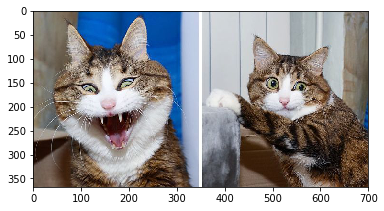

In [22]:
plt.imshow(imagen)

Cada posición de una matriz de 368 pixeles de alto, 700 pixeles de ancho y 3 canales de color, tiene un valor dado.

Queremos que cada pixel de cada color sea un atributo, por lo que queremos transformar la estructura de datos para que quede con una sola fila, con todos los valores de color organizados consecutivamente uno a la derecha del otro.

In [28]:
print("el número de valores que decriben esta imágen es: ", (gato.shape[0]*gato.shape[1]*gato.shape[2]))
gato_plano = gato.reshape(1, -1)
gato_plano.shape

el número de valores que decriben esta imágen es:  772800


(1, 772800)